In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.externals import joblib
from sklearn.datasets import load_iris

import scipy
from scipy import stats

from scipy.stats.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import chi2_contingency

import matplotlib.pyplot as plt
import seaborn as sb
from pylab import rcParams

import statsmodels.api as sm
import statsmodels.formula.api as smf

C:\Users\ecozzolino\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
iris = load_iris()

In [7]:
n_samples, n_features = iris.data.shape
#Features in the Iris dataset:
 #	
#sepal length in cm
#sepal width in cm
#petal length in cm
#petal width in cm
#Target classes to predict:
 #	
#Iris Setosa
#Iris Versicolour
#Iris Virginica
n_samples

150

In [5]:
n_features

4

In [6]:
iris.data[0]

array([ 5.1,  3.5,  1.4,  0.2])

In [8]:
X, y = iris.data, iris.target

In [9]:
from sklearn.svm import LinearSVC
clf = LinearSVC(C=150)

In [10]:
LinearSVC?

In [12]:
clf
#statistical model w/ hyperparameters (parameters that control learning algorithm)
LinearSVC(C=150, class_weight=None, dual=True, fit_intercept=True,
         intercept_scaling=1, loss='l2', multi_class='ovr', penalty='l2',
         tol=0.0001)
#had to remove the option: scale_C=True b/c gave error

LinearSVC(C=150, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='l2', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0)

In [13]:
#default: real model parameters will be tuned automatically from data by calling fit
clf = clf.fit(X,y)
clf.coef_

array([[ 0.30772509,  0.43036305, -1.04233469, -0.61679921],
       [-0.05245327, -1.12809582,  0.62602136, -1.05766477],
       [-0.89254661, -1.24695748,  1.80976987,  2.89067391]])

In [14]:
clf.intercept_

array([ 0.16286893,  2.25480884, -4.58325823])

In [15]:
X_new = [[5.0, 3.6, 1.3, 0.25]]
#create a new X (row?) that looks similar to iris.data[0] to see if it will predict correctly

In [16]:
clf.predict(X_new)
#outcome is 0, which is id of first iris class**

array([0])

In [19]:
#logistic regression models: in sklearn, can predict probabilities of the outcome
from sklearn.linear_model import LogisticRegression
clf2 = LogisticRegression(C=150).fit(X,y)
clf2

LogisticRegression(C=150, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [20]:
clf2.predict_proba(X_new)
#interpretation: X_new has 95% likelihood of belonging to 'setosa' class (first, index0),
#4% likelihood of belonging to versicolor class (second, index1)
#0% likelihood of belonging to 'virginica' class (third, index2)

array([[  9.50517200e-01,   4.94828003e-02,   8.33436426e-17]])

In [21]:
clf2.predict(X_new)
#this method says it's most likely to belong to class0

array([0])

In [22]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, whiten=True).fit(X)

In [23]:
pca.components_

array([[ 0.36158968, -0.08226889,  0.85657211,  0.35884393],
       [ 0.65653988,  0.72971237, -0.1757674 , -0.07470647]])

In [24]:
pca.explained_variance_ratio_

array([ 0.92461621,  0.05301557])

In [25]:
pca.explained_variance_ratio_.sum()

0.97763177502480336

In [26]:
X_pca=pca.transform(X)
#this means the dataset has been 'normalized' - centered on both components
#(the 2 that we specified in the PCA command), with unit variance

In [27]:
np.round(X_pca.mean(axis=0), decimals=5)

array([-0., -0.])

In [28]:
np.round(X_pca.std(axis=0), decimals=5)

array([ 0.99666,  0.99666])

In [29]:
np.round(np.corrcoef(X_pca.T), decimals=5)

array([[ 1.,  0.],
       [ 0.,  1.]])

In [30]:
import pylab as pl
from itertools import cycle
def plot_2D(data, target, target_names):
     colors = cycle('rgbcmykw')
     target_ids = range(len(target_names))
     pl.figure()
     for i, c, label in zip(target_ids, colors, target_names):
         pl.scatter(data[target == i, 0], data[target == i, 1],
                    c=c, label=label)
     pl.legend()
     pl.show()

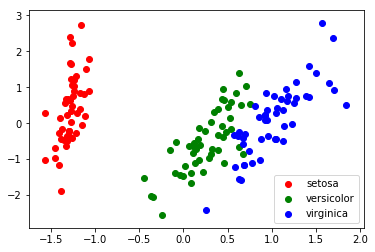

In [31]:
plot_2D(X_pca, iris.target, iris.target_names)

In [34]:
from sklearn.cluster import KMeans
from numpy.random import RandomState
rng = RandomState(42)
#try to find 3 groups of samples using KMeans (simplest clustering algorithm)

In [35]:
kmeans = KMeans(3, random_state=rng).fit(X_pca)

In [36]:
np.round(kmeans.cluster_centers_, decimals=2)

array([[ 1.01,  0.7 ],
       [ 0.33, -0.89],
       [-1.28,  0.43]])

In [37]:
kmeans.labels_[:10]

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [38]:
kmeans.labels_[-10:]

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 1])

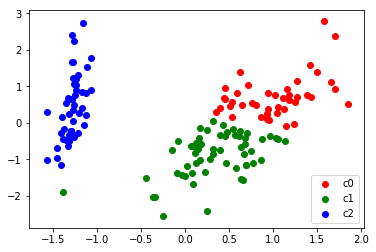

In [39]:
plot_2D(X_pca, kmeans.labels_, ["c0", "c1", "c2"])

In [44]:
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size=1/3, random_state=42)

In [45]:
X_train.shape

(100, 4)

In [46]:
X_test.shape

(50, 4)

In [47]:
y_train.shape

(100,)

In [48]:
y_test.shape

(50,)

In [49]:
clf = LinearSVC(C=150).fit(X_train, y_train)

In [50]:
np.mean(clf.predict(X_test) == y_test)
#this gives us the average number of correct classifications on test set

0.85999999999999999

In [51]:
clf = LinearSVC(C=150)

In [53]:
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(clf, X, y, cv=10)
scores

array([ 1.        ,  1.        ,  1.        ,  0.93333333,  0.93333333,
        0.86666667,  0.86666667,  1.        ,  1.        ,  1.        ])

In [54]:
scores.mean(), scores.std()
#mean score is 0.96, sd 0.05

(0.96000000000000019, 0.053333333333333323)